# --------------------------------------- INITIALIZATION ---------------------------------------

# นำเข้า PYTHON PACKAGES

#### Package หรือ Module จะเก็บรวบรวมชุดคำสั่งสำเร็จรูปไว้ เพื่อให้การเขียนโปรแกรมนั้นง่ายขึ้น ซึ่งก็จะแตกต่างกันไปแล้วแต่วัตถุประสงค์ของ module นั้นๆ ในตอนเริ่มแรกเราจำเป็นจะต้องนำเข้า package หรือ module ที่จำเป็นในการทำงานของเราก่อนในตอนแรก

In [2]:
pip install flask opencv-python ipywidgets tensorflow pandas matplotlib scikit-learn earthpy  rasterio plotly seaborn lightgbm shap

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/c7/ec/9dabb6a9abfdebb3c45b0cc52dec901caafef2b2c7e7d6a839ed86d81e91/opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
  Obtaining dependency information for earthpy from https://files.pythonhosted.org/packages/a7/72/98c78371de0ffd281d89f7da85bb2001aa6ce9820fabbfd2adfee99e1935/earthpy-0.9.4-py3-none-any.whl.metadata
  Obtaining dependency information for rasterio from https://files.pythonhosted.org/packages/b3/0f/e7f21b87636029955ab4e0e81027dc491d99c2b6215e68c6d8f38e5291b3/rasterio-1.3.9-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/e1/4c/4685ccfae9806f561de716e32549190c1f533dde5bcadaf83bdf23972cf0/lightgbm-4.3.0-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/a3/89/f5cca6e299320e19194ad09f6014db33208a49e8d9161e729725eb17f8a8/shap-0.

In [3]:
from glob import glob ## ใช้จัดการเรื่องการหา path,ไฟล์ต่างๆ >>> docs.python.org/3/library/glob.html

import rasterio as rio ## เป็นโมดูลที่ใช้จัดการกับภาพถ่ายดาวเทียมและภูมิศาสตร์ต่างๆ เพื่อสกัดข้อมูลเชิงตัวเลขจากข้อมูลรูปภาพ >>> rasterio.readthedocs.io

import numpy as np ## ใช้สำหรับการสร้างArrayหลายมิติ >>> numpy.org

import earthpy.plot as ep ## ใช้สำหรับการ plot ภาพ raster >>> earthpy.readthedocs.io

from skimage import io ## โมดูลสำหรับการจัดการเรื่องภาพ >>> scikit-image.org

import matplotlib.pyplot as plt ## โมดูลสำหรับการแสดงผลภาพและกราฟต่างๆ >>> matplotlib.org

import warnings ## โมดูลสำหรับจัดการเรื่องการแจ้งเตือนของ python kernel
warnings.filterwarnings(action='ignore') ## ปิดการแสดงการแจ้งเตือนทั้งหมดจากระบบ

# กำหนด PATH

In [56]:
POST_QPB_IMG_PATH = 'IMAGES/PB/5/' ## โฟลเดอร์ที่เก็บภาพ
POST_QPB = "T47QMB_20210226T035719" ## ชื่อไฟล์ในโฟลเดอร์
POST_QPB_GROUNDTRUTH_PATH = "T47QMB_20210226.tif" #ชื่อไฟล์ภาพผลเฉลย

In [57]:
POST_QPB_IMG_SET = glob(f'{POST_QPB_IMG_PATH }{POST_QPB}*B?*.tif') #ใช้ glob เพื่อรวบรวม pathและชื่อ ของไฟล์ที่กำหนด
POST_QPB_IMG_SET

['IMAGES/PB/5\\T47QMB_20210226T035719_B02.tif',
 'IMAGES/PB/5\\T47QMB_20210226T035719_B03.tif',
 'IMAGES/PB/5\\T47QMB_20210226T035719_B04.tif',
 'IMAGES/PB/5\\T47QMB_20210226T035719_B05.tif',
 'IMAGES/PB/5\\T47QMB_20210226T035719_B06.tif',
 'IMAGES/PB/5\\T47QMB_20210226T035719_B07.tif',
 'IMAGES/PB/5\\T47QMB_20210226T035719_B08.tif',
 'IMAGES/PB/5\\T47QMB_20210226T035719_B11.tif',
 'IMAGES/PB/5\\T47QMB_20210226T035719_B12.tif']

In [58]:
POST_QPB_IMG_SET.sort() ## เรียงภาพตามลำดับ spectral band ของดาวเทียม sentinel-2
POST_QPB_IMG_SET

['IMAGES/PB/5\\T47QMB_20210226T035719_B02.tif',
 'IMAGES/PB/5\\T47QMB_20210226T035719_B03.tif',
 'IMAGES/PB/5\\T47QMB_20210226T035719_B04.tif',
 'IMAGES/PB/5\\T47QMB_20210226T035719_B05.tif',
 'IMAGES/PB/5\\T47QMB_20210226T035719_B06.tif',
 'IMAGES/PB/5\\T47QMB_20210226T035719_B07.tif',
 'IMAGES/PB/5\\T47QMB_20210226T035719_B08.tif',
 'IMAGES/PB/5\\T47QMB_20210226T035719_B11.tif',
 'IMAGES/PB/5\\T47QMB_20210226T035719_B12.tif']

# --------------------------------------- DATA ACQUISITION ---------------------------------------

# 1.นำเข้าข้อมูลภาพด้วย Rasterio

In [59]:
POST_QPB_RASTER = np.array([]) ## สร้าง numpy array เพื่อไว้เก็บภาพที่แปลงเป็น raster ทั้งหมดแล้ว
_BUFF = [] ## สร้าง list เพื่อเก็บข้อมูล raster ของแต่ละภาพ

for _ in POST_QPB_IMG_SET:
    with rio.open(_, 'r') as img: ## การใช้ rio อ่านภาพถ่ายดาวเทียมและแปลงเป็นเชิงตัวเลข
        _BUFF.append(img.read(1))

POST_QPB_RASTER = np.stack(_BUFF) ## นำ list ที่เก็บข้อมูล raster ของแต่ละภาพมาแปลงเป็น array หลายมิติ

print(POST_QPB_RASTER.shape) ## ดูรูปร่างของ array

ValueError: all input arrays must have the same shape

In [42]:
print(f'Height: {POST_QPB_RASTER.shape[1]}\n\
Width: {POST_QPB_RASTER.shape[2]}\n\
Bands: {POST_QPB_RASTER.shape[0]}')

Height: 500
Width: 500
Bands: 9


# 2.Plot Scpectral Band จากข้อมูล Raster 

#### Spectral bands ทั้งหมดของ Sentinel-2 (ตัวหนา คือไม่มีภาพให้)

##### Band 1 >> Coastal aerosol

Band 2 >> Blue

Band 3 >> Green

Band 4 >> Red

Band 5 >> Vegetation red edge 1

Band 6 >> Vegetation red edge 2 

Band 7 >> Vegetation red edge 3 

##### Band 8 >> NIR

Band 8A >> Narrow NIR

##### Band 9 >> Water vapour

##### Band 10 >> SWIR – Cirrus

Band 11 >> SWIR 1

Band 12 >> SWIR 2

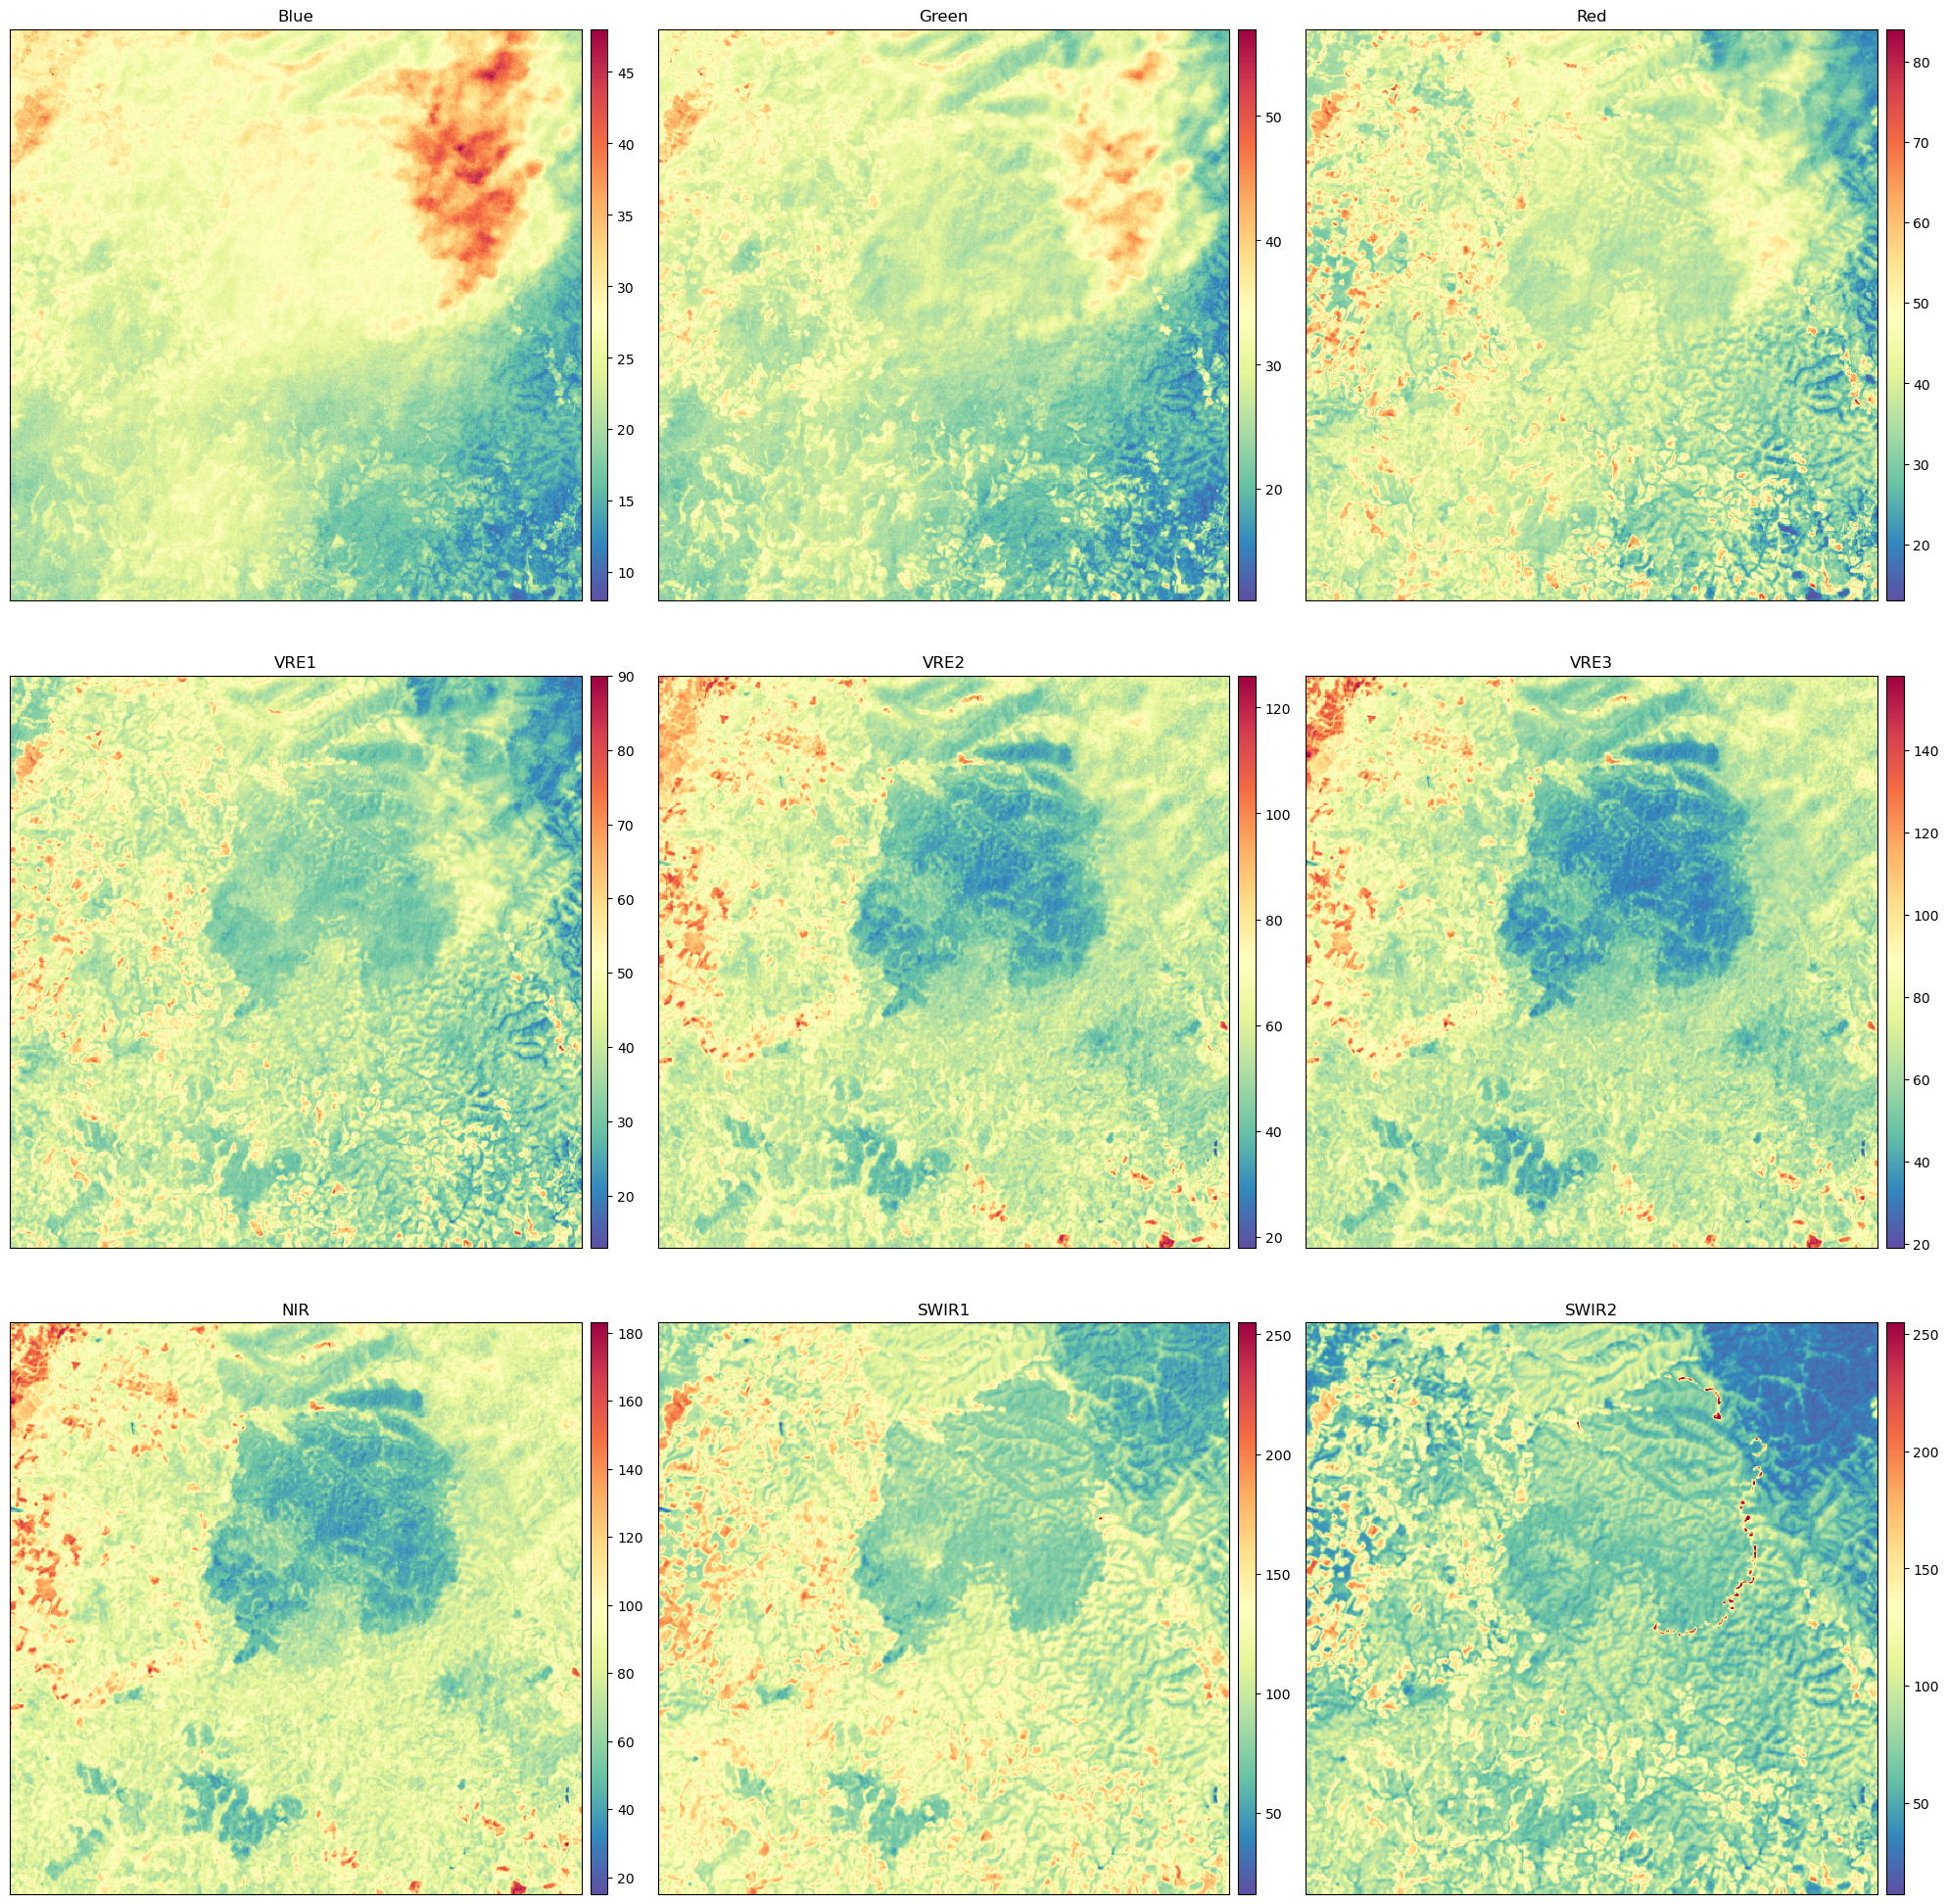

In [43]:
Available_bands = [ 'Blue', 'Green', 'Red','VRE1','VRE2','VRE3', 'NIR', 'SWIR1', 'SWIR2'] ## list ของ band ที่ใช้ในงานเรียงตามลำดับ

ep.plot_bands( ## Plot ภาพ raster ของแต่ละ band
    POST_QPB_RASTER, ## array ที่ต้องการนำมาแสดง
    cmap='Spectral_r', ## ทำให้ภาพถูก map ด้วยสีแบบ spectral range 
    cols=3, ## กำหนด column ในการ plot 
    figsize=(20, 20), ## กำหนดขนาดภาพในการ plot (ไม่ควรเกิน 20,20)
    cbar=True, ## เปิดให้เห็นค่าแถบสี
    title=Available_bands ## แสดง title ของแต่ละภาพ
);

# 3.Plot ภาพสีผสมจริง (RGB) จากข้อมูล Raster 

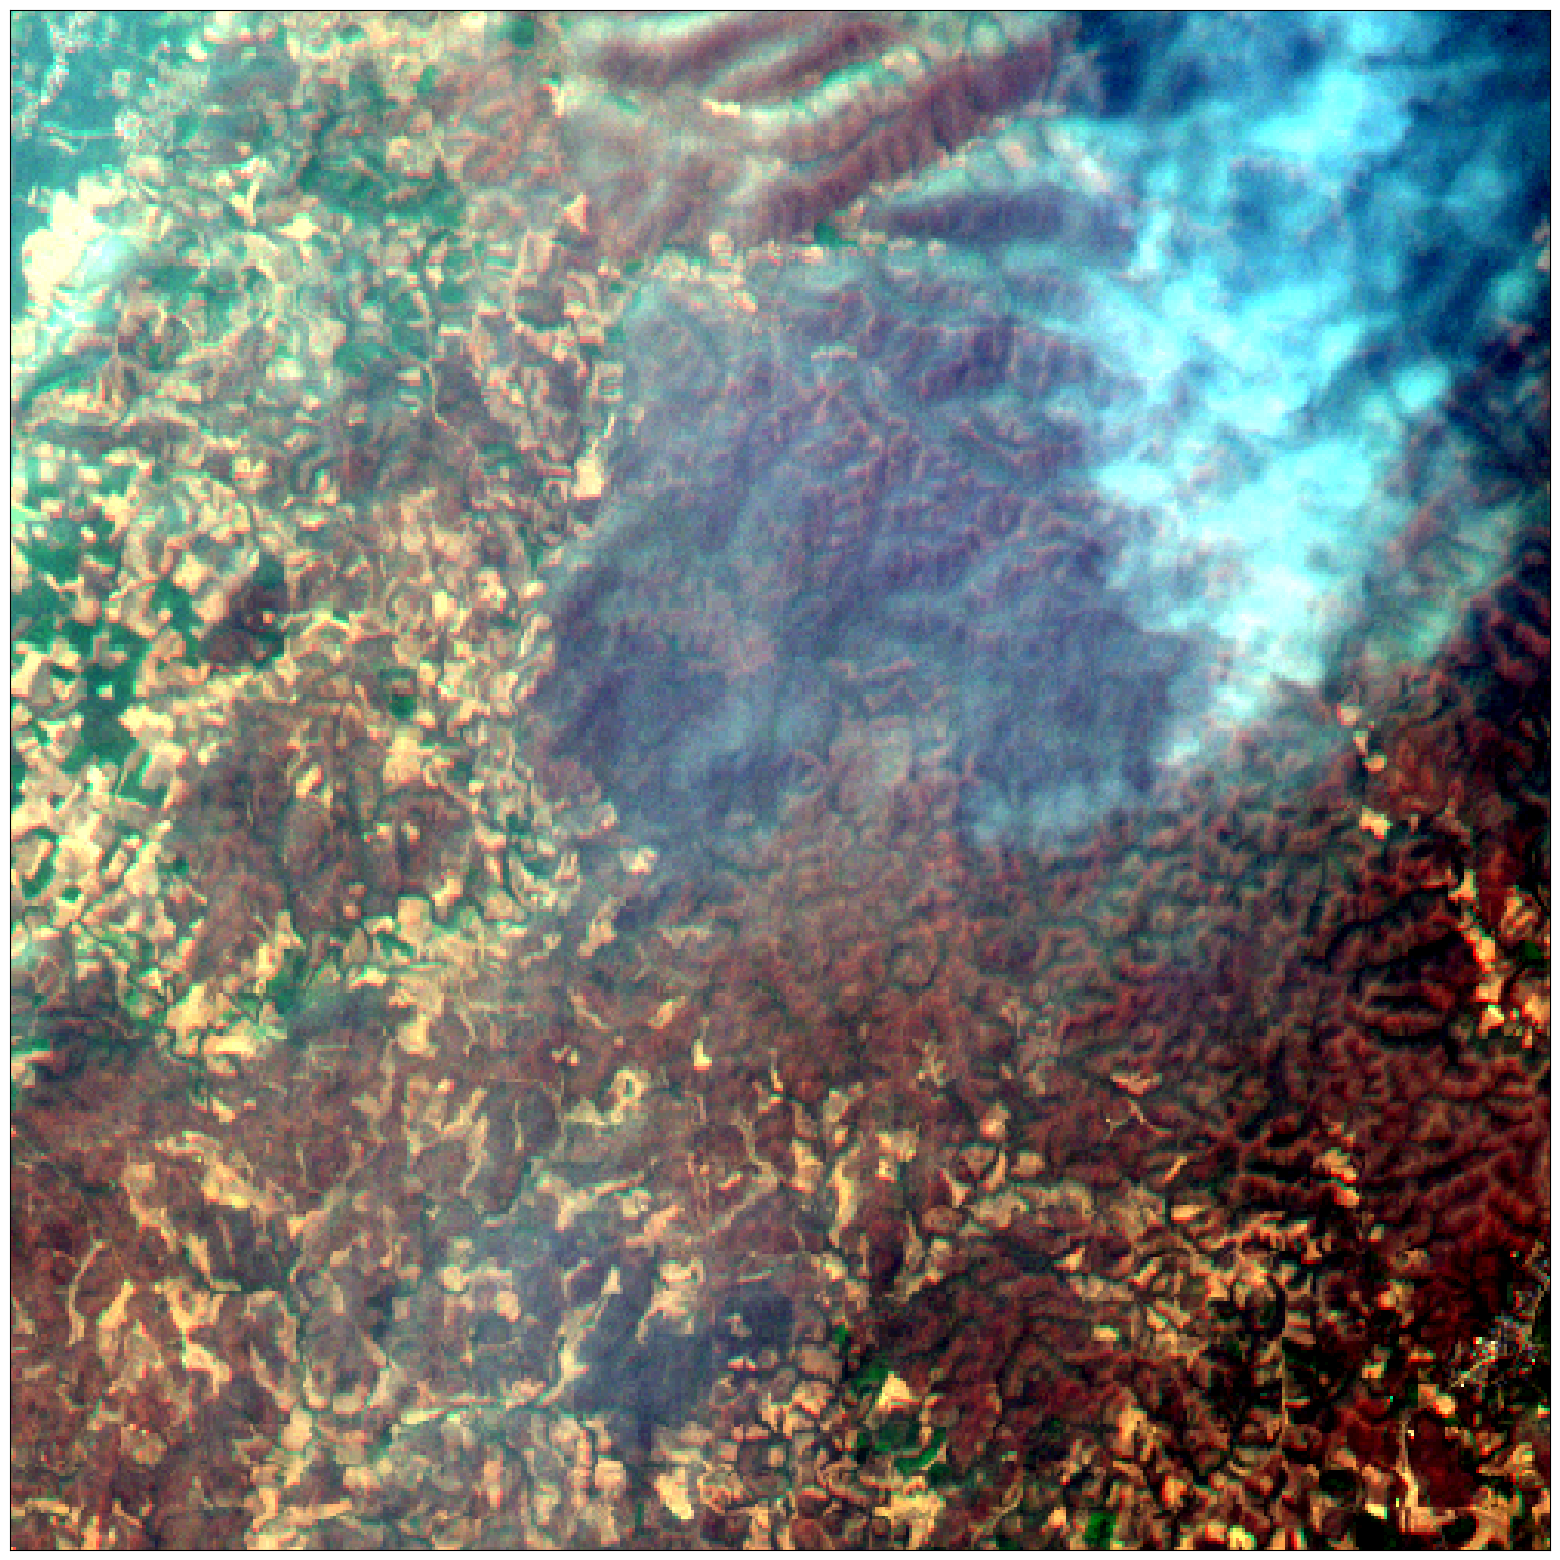

<Axes: >

In [44]:
ep.plot_rgb( ## Plot ภาพ raster ของแต่ละ band
    POST_QPB_RASTER, ## array ที่ต้องการนำมาแสดง
    rgb=(2, 1, 0), ## เลือกภาพที่เป็น R, G, B ใน raster array มาใส่ตามลำดับ ในกรณีนี้คือ 2, 1, 0
    figsize=(20, 20),
    stretch=True, ## ปรับเป็น True เพื่อทำให้ภาพมีความสว่างขึ้น และมองเห็นรายละเอียดง่ายขึ้น 
)

# 4.นำเข้าภาพผลเฉลย (Ground Truth)

In [45]:
POST_QPB_GROUNDTRUTH = io.imread( ## นำเข้าภาพถ่ายผลเฉลยด้วย Skimage
    POST_QPB_IMG_PATH + POST_QPB_GROUNDTRUTH_PATH, ## กำหนดที่อยู่ของไฟล์
    as_gray=True ## อ่านรูปภาพเป็นแบบ Gray Scale
) 
POST_QPB_GROUNDTRUTH_GRAY = np.array(POST_QPB_GROUNDTRUTH) ## แปลง List ให้เป็น Numpy Array

print("Shape: ",POST_QPB_GROUNDTRUTH_GRAY.shape) ## แสดงรูปร่างของ Array

Shape:  (500, 500)


## 4.1 แสดงเป็นภาพ

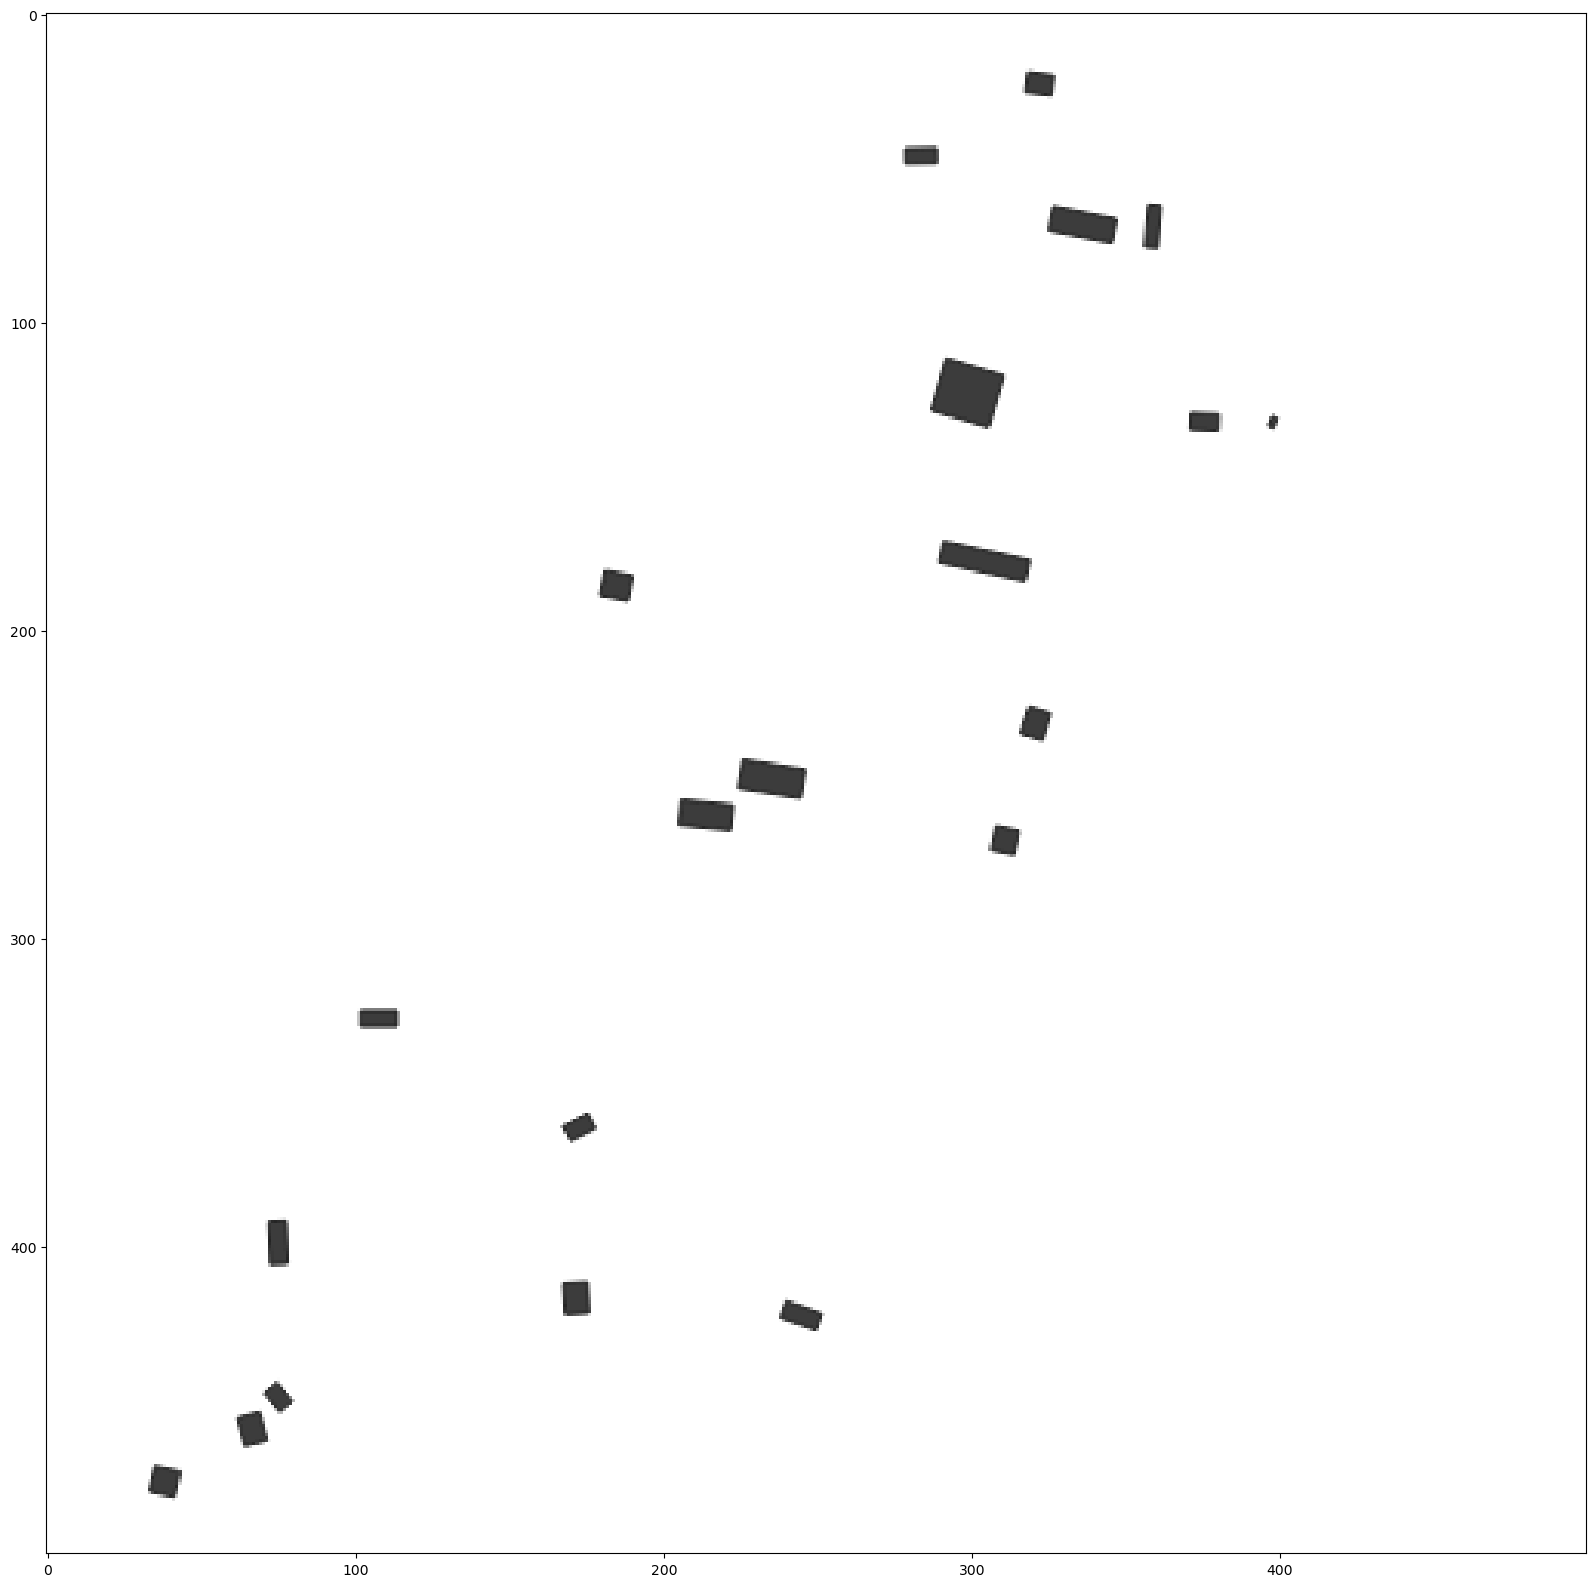

In [46]:
plt.figure(figsize=(20,20)) ##กำหนดขนาดภาพ
plt.imshow( ##แสดงภาพ
    POST_QPB_GROUNDTRUTH_GRAY, ## array ที่ต้องการนำมาแสดง
    cmap=plt.get_cmap('gray'), ## เลือกรูปแบบmapของการแสดงภาพ
    vmin=0,  ## กำหนดค่าสเกลต่ำสุด
    vmax=1 ## กำหนดค่าสเกลมากสุด
) 

## 4.2 ลบขอบเบลอจากภาพ

In [15]:
intensity = 0.6 ## กำหนดความความเข้ม ตั้งแต่ 0 - 1 (0 คือเข้มที่สุด)
POST_QPB_MASK = (POST_QPB_GROUNDTRUTH_GRAY < intensity).astype(int) ## เลือกเฉพาะ pixel ที่มีค่าความเข้มน้อยกว่าค่า intensity ที่กำหนด

print(POST_QPB_MASK) ## แสดงตัวอย่างค่าใน Array

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### แสดงผล

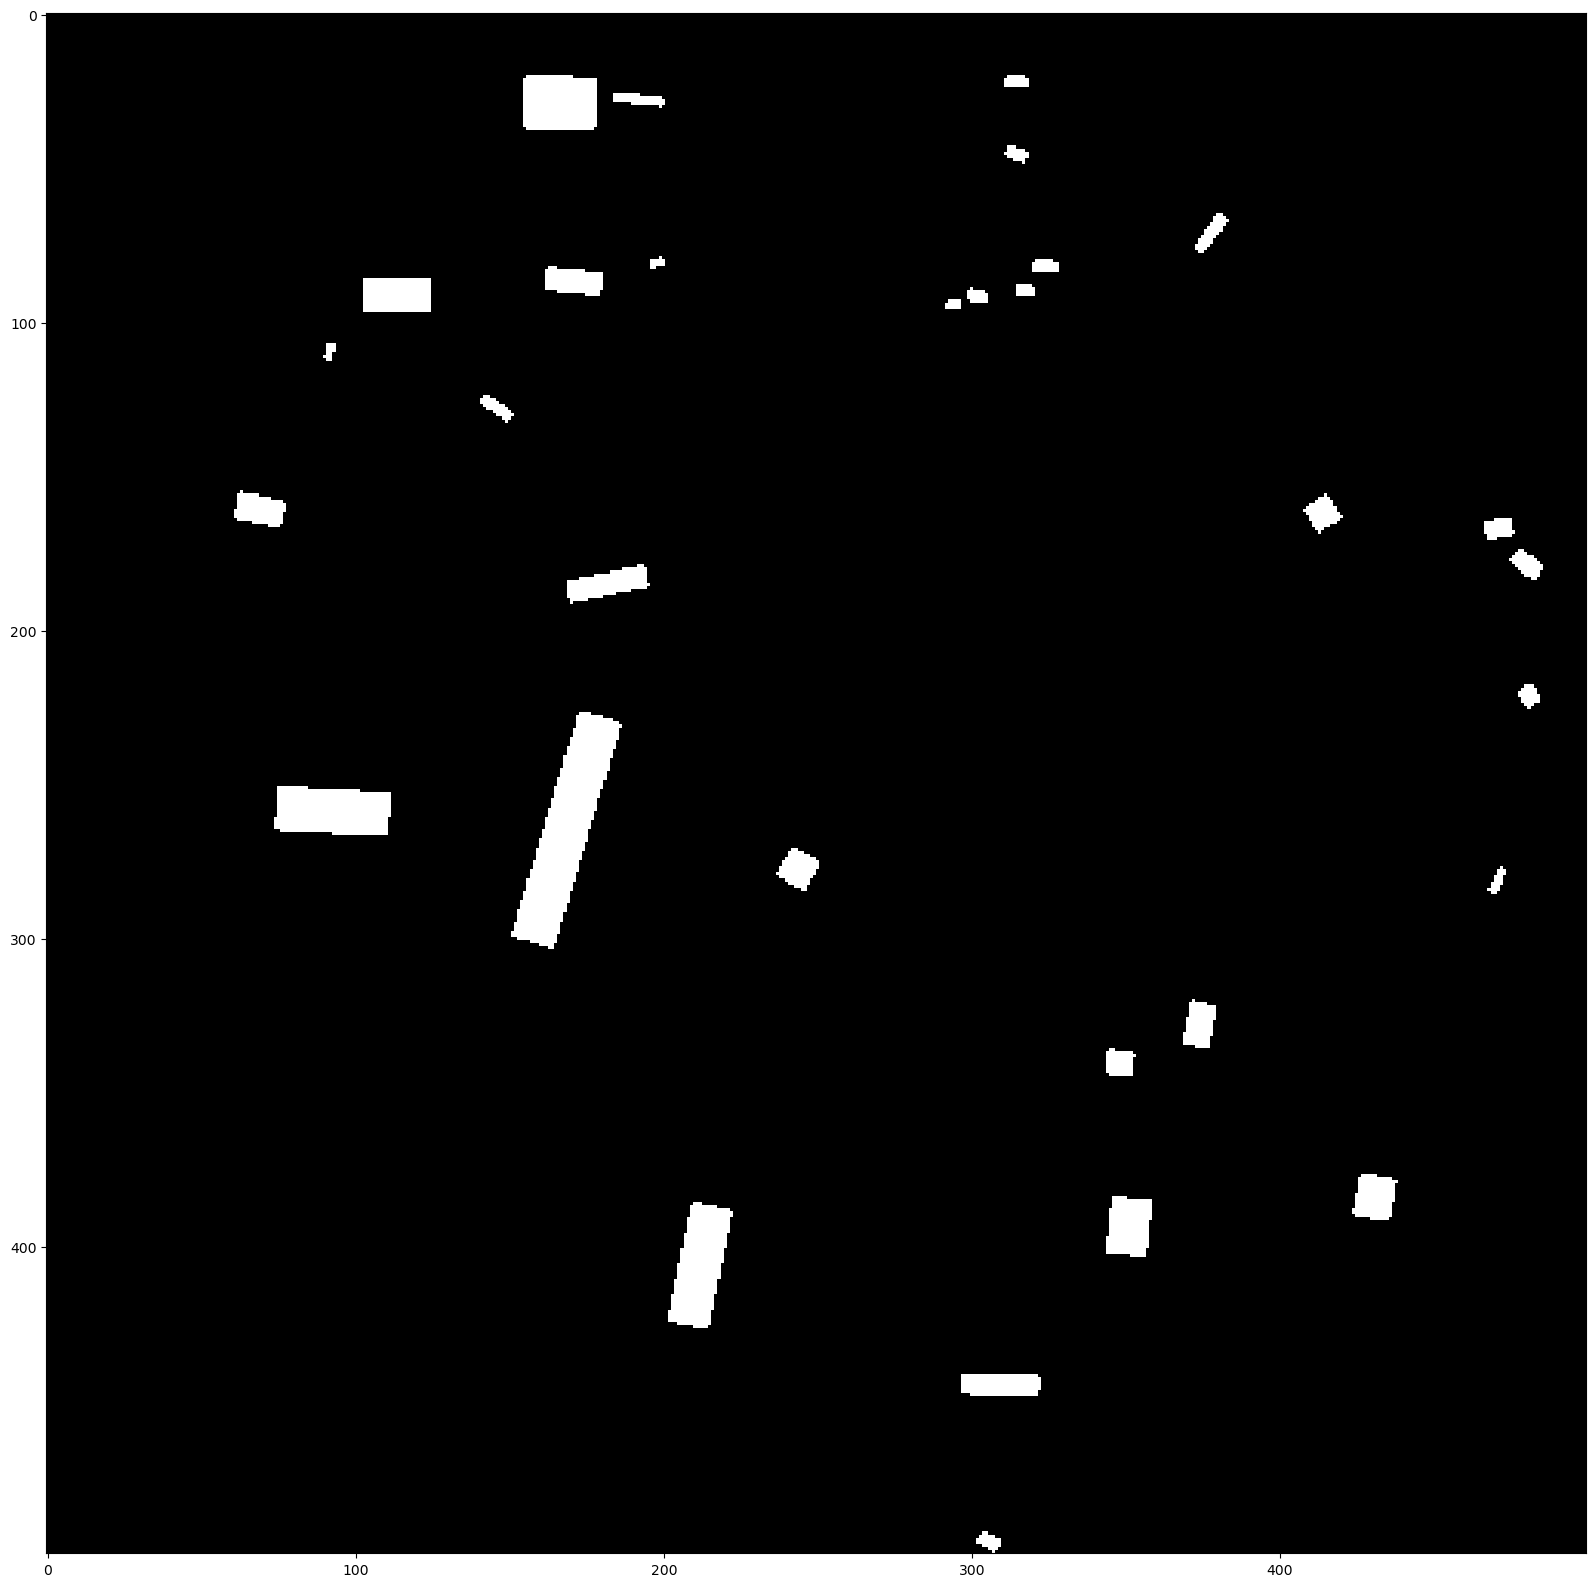

In [16]:
plt.figure(figsize=(20,20))
plt.imshow(
    POST_QPB_MASK, 
    cmap=plt.get_cmap('gray'), 
    vmin=0, 
    vmax=1
)